# CTA 1.0

In [1]:
import warnings

import pandas as pd
import numpy as np

#from cvx.simulator import Builder
from cvx.simulator import interpolate
from cvx.simulator import Portfolio

warnings.simplefilter(action='ignore', category=FutureWarning)


In [2]:
# Load prices
prices = pd.read_csv("data/Prices_hashed.csv", index_col=0, parse_dates=True)

# interpolate the prices
prices = prices.apply(interpolate)

In [3]:
# take two moving averages and apply sign-functiond
def f(price, fast=32, slow=96):
    s = price.ewm(com=slow, min_periods=100).mean()
    f = price.ewm(com=fast, min_periods=100).mean()
    return np.sign(f-s) 

In [4]:
from ipywidgets import Label, HBox, VBox, IntSlider

fast = IntSlider(min=4, max=192, step=4, value=32)
slow = IntSlider(min=4, max=192, step=4, value=96)
left_box = VBox([Label("Fast Moving Average"), Label("Slow Moving Average")])
right_box = VBox([fast, slow])
HBox([left_box, right_box])

In [5]:
pos = 5e6*prices.apply(f, fast=fast.value, slow=slow.value).fillna(0.0)

In [6]:
#builder = Builder(prices=prices, initial_aum=1e8)

#for t, state in builder:
#    # update the position
#    position = pos.loc[t[-1]]
#    builder.cashposition = position[state.assets].values
#    # Do not apply trading costs
#    builder.aum = state.aum

#portfolio = builder.build()

portfolio = Portfolio.from_cashpos_prices(prices=prices, cashposition=pos, aum=1e8)


Results do not look terrible but...
* No concept of risk integrated. 
* The size of each bet is constant regardless of the underlying asset.
* The system lost its mojo in 2009 and has never really recovered.
* The sign function is very expensive to trade as position changes are too extreme.

Such fundamental flaws are not addressed by **parameter-hacking** or **pimp-my-trading-system** steps (remove the worst performing assets, insane quantity of stop-loss limits, ...)


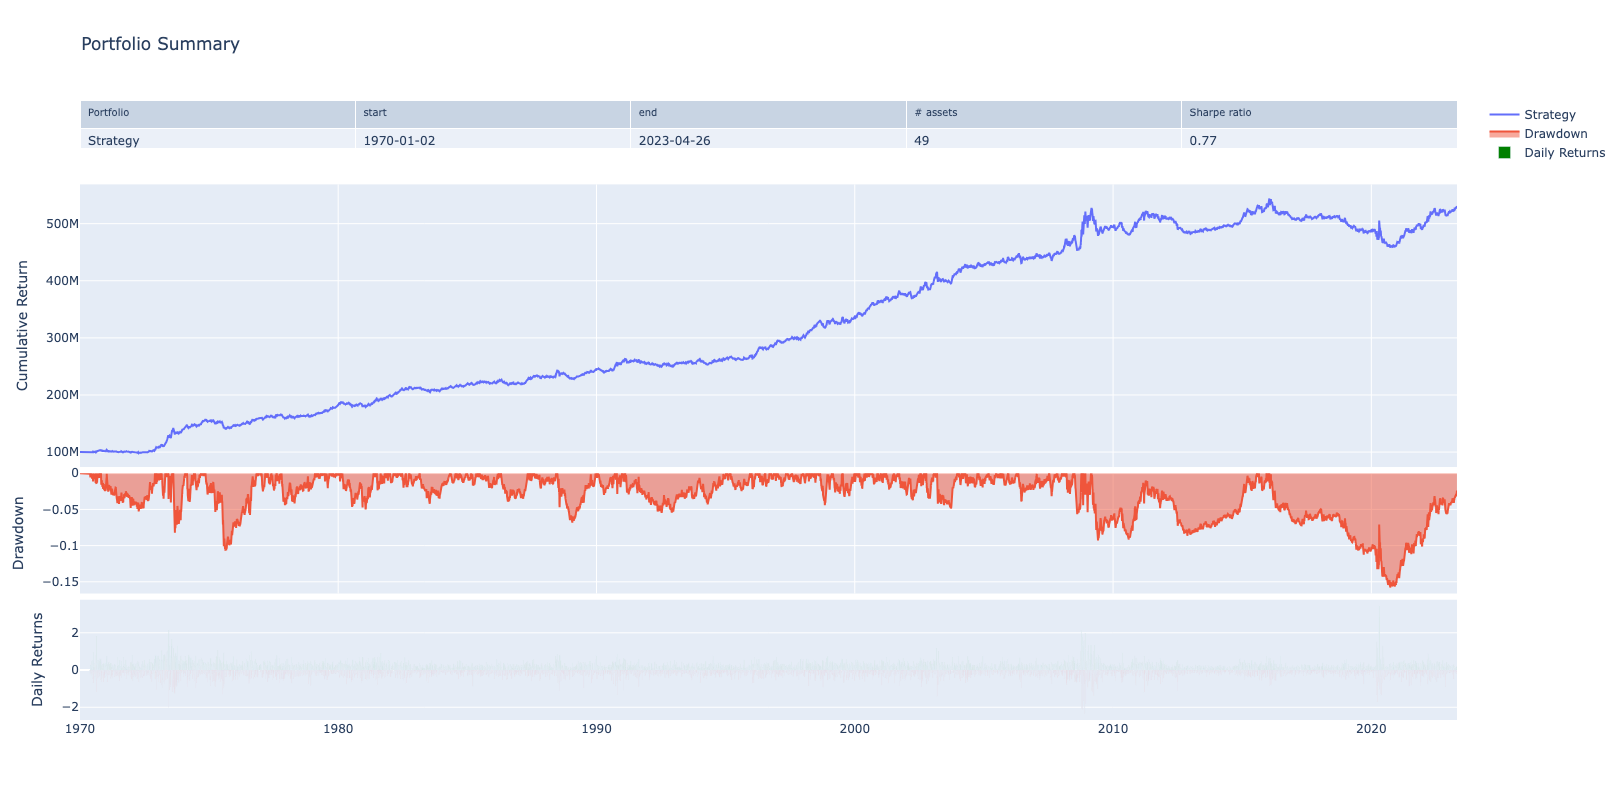

In [7]:
portfolio.snapshot()

In [8]:
pd.set_option('display.precision', 2)
portfolio.sharpe()

np.float64(0.768783975639483)

cvxSimulator can construct portfolio objects. Those objects will expose functionality and attributes supporting all analytics.
There are two types of portfolio -- EquityPortfolio and FuturesPortfolio. We start with the FuturesPortfolio. The most simple use-case
is when we have computed all desirec cash-positions 